In [1]:
import sys  
sys.path.insert(0, '../')
from tools.base_training import make_base_training, test_on_dataset
from imagenet_models.resnet import resnet18

import torch.nn as nn
import torch

In [2]:
variation = "original"

In [3]:
net = resnet18(pretrained=True)

In [4]:
net.fc = nn.Linear(512, 9)

In [5]:
n_epoch_first_train = 10

using cuda



Finished Training
Final acc :  100.0

Accuracy Graph


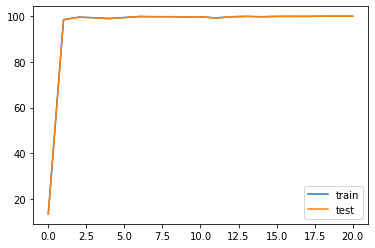


Loss Graph


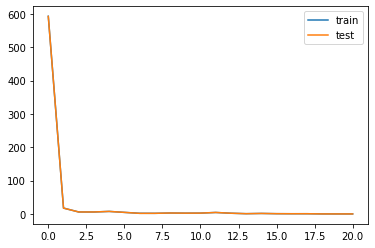


Learning Rate Curve


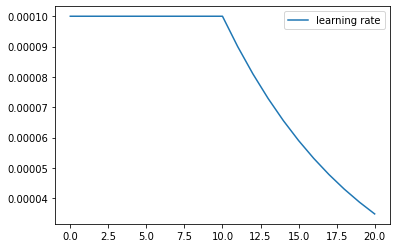

In [6]:
make_base_training(variation,
                   net,
                   n_epoch_first_train = n_epoch_first_train,
                   batch_size = 16,
                   workers = 0,
                   criterion = nn.CrossEntropyLoss(),
                   test_acc_period = 5,
                   _print = False)

In [7]:
PATH = "../models/ResNet_base.pt"
torch.save(net.state_dict(), PATH)

In [8]:
for variation in ["original","mixed_same", "mixed_next", "mixed_rand", "no_fg", "only_bg_b", "only_bg_t", "only_fg"] :
    acc = test_on_dataset(variation = variation, net=net)
    print("Accuracy on ", variation, " : ", acc)

Accuracy on  original  :  100.0
Accuracy on  mixed_same  :  91.95061728395062
Accuracy on  mixed_next  :  77.80246913580247
Accuracy on  mixed_rand  :  80.0246913580247
Accuracy on  no_fg  :  52.888888888888886
Accuracy on  only_bg_b  :  29.28395061728395
Accuracy on  only_bg_t  :  34.54320987654321
Accuracy on  only_fg  :  93.33333333333333
